In [1]:
import networkx as nx

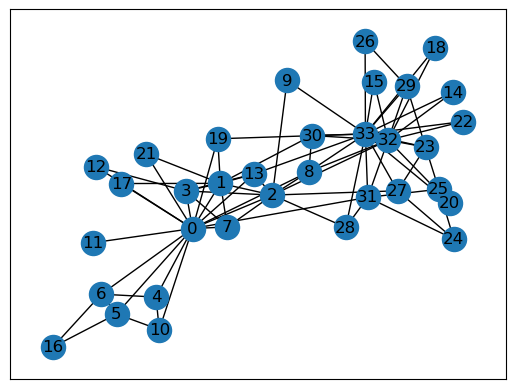

In [35]:
G = nx.karate_club_graph()
karate_position = nx.spring_layout(G, k=0.3)
nx.draw_networkx(G, karate_position)

In [36]:
# The nodes and edges in a Graph class can be accessed using its nodes and edges attributes. 
# These attributes are iterables and can be used to iterate over nodes and edges, 
# or converted to a list of node IDs and edges,
list(G.nodes)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33]

In [37]:
list(G.edges)

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 17),
 (0, 19),
 (0, 21),
 (0, 31),
 (1, 2),
 (1, 3),
 (1, 7),
 (1, 13),
 (1, 17),
 (1, 19),
 (1, 21),
 (1, 30),
 (2, 3),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 13),
 (2, 27),
 (2, 28),
 (2, 32),
 (3, 7),
 (3, 12),
 (3, 13),
 (4, 6),
 (4, 10),
 (5, 6),
 (5, 10),
 (5, 16),
 (6, 16),
 (8, 30),
 (8, 32),
 (8, 33),
 (9, 33),
 (13, 33),
 (14, 32),
 (14, 33),
 (15, 32),
 (15, 33),
 (18, 32),
 (18, 33),
 (19, 33),
 (20, 32),
 (20, 33),
 (22, 32),
 (22, 33),
 (23, 25),
 (23, 27),
 (23, 29),
 (23, 32),
 (23, 33),
 (24, 25),
 (24, 27),
 (24, 31),
 (25, 31),
 (26, 29),
 (26, 33),
 (27, 33),
 (28, 31),
 (28, 33),
 (29, 32),
 (29, 33),
 (30, 32),
 (30, 33),
 (31, 32),
 (31, 33),
 (32, 33)]

In [38]:
# Another simple way to interact with a network is to check 
# whether a particular node is present. 
mr_hi = 0
mr_hi in G

True

In [7]:
G.has_node(mr_hi)

True

In [8]:
wild_goose = 1337
wild_goose in G

False

In [9]:
G.has_node(wild_goose)

False

In [11]:
# In general, the set of nodes that are connected to a particular node by an 
# edge are called that node's neighbors and can be found using the neighbors() method 
# of the Graph class.
list(G.neighbors(mr_hi))

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]

In [17]:
# If you just want to know whether Mr. Hi is friends 
# with a particular club member (say node ID 1)
member_id = 1
(mr_hi, member_id) in G.edges

True

In [23]:
G.has_edge(member_id, mr_hi)

True

In [24]:
john_a = 33
(mr_hi, john_a) in G.edges

False

In [25]:
G.has_edge(mr_hi, john_a)

False

In [45]:
# We can add an attribute to each node to describe which splinter club the 
# corresponding member joined after the original club disbanded. 
# The club joined by member i is given by the ith element of the following list:
member_club = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 
               0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 
               1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 
               1, 1, 1, 1]

for node_id in G.nodes:
    G.nodes[node_id]["club"] = member_club[node_id]

In [30]:
# Attributes can also be added automatically when a new node is added by passing 
# keyword arguments to add_node()
G.add_node(11, club=0)

In [47]:
# Now that the club attribute has been set for all the nodes, 
# it's possible to check the value of that attribute for individual nodes
G.nodes[mr_hi]

{'club': 0}

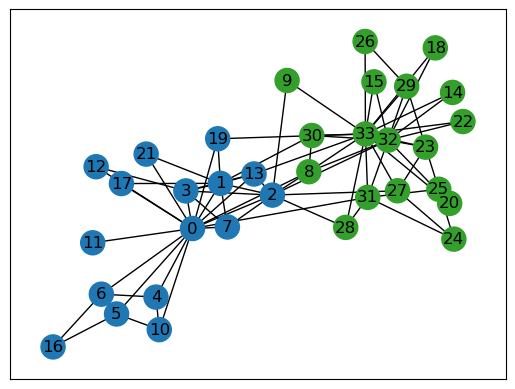

In [50]:
# We can visualize these different clubs by using different colors. 
# The list of node colors can be created by iterating through the nodes and 
# assigning a color based on their club attribute. 
# That list can then be passed to the draw_networkx()
node_colors = ['#1f78b4' if G.nodes[v]["club"] == 0 else '#33a02c' for v in G]
nx.draw_networkx(G, karate_position, label=True, node_color=node_colors)
(0, 31)
(1, 30)
(2, 8)
(2, 9)
(2, 27)
(2, 28)
(2, 32)
(13, 33)
(19, 33)

In [ ]:
# Adding attributes to edges works much like it does for nodes. 
# In a G network, an edge's attributes are stored in the dict at G.edges[v, w], 
# where v and w are the node IDs of the edge endpoints. 
# Note that since the Graph class represents an undirected network, 
# these attributes can also be accessed at G.edges[w, v].

In [51]:
# Some of the edges in the karate club network connect members who joined
# the same splinter club, while other edges connect members from different splinter clubs. 
# This information can be stored in the Graph class using edge attributes. 
# To do so, iterate through all the edges, and check whether the edge endpoints
# have the same club attribute. In this example, I create an attribute called 
# internal to represent whether an edge is internal to a single splinter club
# Iterate through all edges:
for v, w in G.edges:
    # Compare 'club' property of edge endpoints
    # Set edge 'internal' property to True if they match
    if G.nodes[v]["club"] == G.nodes[w]["club"]:
        G.edges[v, w]["internal"] = True
    else:
        G.edges[v, w]["internal"] = False

In [52]:
internal = [e for e in G.edges if G.edges[e]["internal"]]
external = [e for e in G.edges if ~G.edges[e]["internal"]]

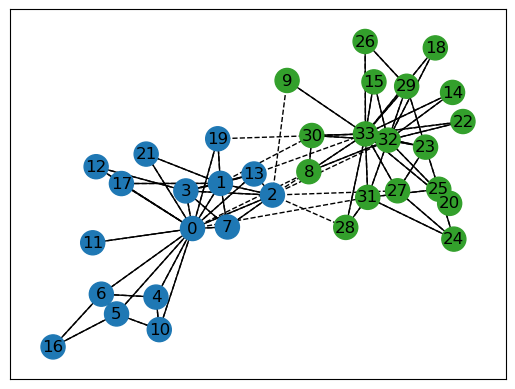

In [93]:
# NetworkX can only draw one line style at a time, 
# so multiple line styles requires nodes, edges, and labels to be drawn separately. 
# While doing so takes more code, it gives more control over the final output. 
# Draw nodes and node labels
nx.draw_networkx_nodes(G, karate_position, node_color=node_colors)
nx.draw_networkx_labels(G, karate_position)

# Draw internal edges as solid lines 
nx.draw_networkx_edges(G, karate_position, edgelist=internal)
nx.draw_networkx_edges(G, karate_position, edgelist=external, style="dashed")